In [1]:
# !pip install scikit-plot

In [1]:
import pandas as pd
import numpy as np
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report, f1_score, recall_score, precision_score
import matplotlib.pyplot as plt
import scikitplot as skplt

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aom2\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
df_bin = pd.read_excel("content/final_trainset.xlsx")
df_bin['binary2_label'].value_counts()
df_test = pd.read_excel("content/final_testset.xlsx")
df_bin['ABSTRACT'] = df_bin['ABSTRACT'].apply(str.lower)
df_test['ABSTRACT'] = df_test['ABSTRACT'].apply(str.lower)

In [6]:
def bin_model(model_type, vectortype):
    if vectortype == "tfidf":
        vectorizer = TfidfVectorizer()
    elif vectortype == "countvec":
        vectorizer = CountVectorizer()

    bow_train = np.array(vectorizer.fit_transform(df_bin['ABSTRACT']).todense())

    X_train = bow_train
    y_train = df_bin['binary2_label']

    if model_type == 'nb':
        model = MultinomialNB().fit(X_train, y_train)
    elif model_type == 'lr':
        model = LogisticRegression(max_iter=1000).fit(X_train, y_train)
    elif model_type == 'svm':
        model = LinearSVC().fit(X_train, y_train)
    elif model_type == 'knn':
        model = KNeighborsClassifier(n_neighbors=7).fit(X_train, y_train)
    elif model_type == 'rf':
        model = RandomForestClassifier().fit(X_train, y_train)
    elif model_type == 'ada':
        model = AdaBoostClassifier(n_estimators=50).fit(X_train, y_train)
    elif model_type == 'gb':
        model = GradientBoostingClassifier(n_estimators=50).fit(X_train, y_train)

    print('Training Accuracy:', model.score(X_train, y_train))

    bow_test = vectorizer.transform(df_test['ABSTRACT'])
    X_test = bow_test
    y_test = df_test['binary2_label']
    y_pred = model.predict(X_test)

    print('Test Accuracy:', accuracy_score(y_test, y_pred))
    print('F1 score:', f1_score(y_test, y_pred, average="macro"))
    print('Precision:', precision_score(y_test, y_pred, average="macro"))
    print('Recall:', recall_score(y_test, y_pred, average="macro"))

    fig = plt.figure(figsize=(15,6))
    ax1 = fig.add_subplot(121)

    skplt.metrics.plot_confusion_matrix(y_test, y_pred,
                                    title="Binary Confusion Matrix",
                                    ax=ax1)
#     plt.savefig('/content/drive/MyDrive/BinMLResults' + model_type + '_' + vectortype + '_binmat.png')
    # return y_test, y_pred

In [7]:
# from google.colab import drive
# drive.mount('/content/drive')

C:\Users\aom2\AppData\Local\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Training Accuracy: 0.9843473870234789
Test Accuracy: 0.78125
F1 score: 0.7721809986339045
Precision: 0.7801282051282051
Recall: 0.7685861522823441


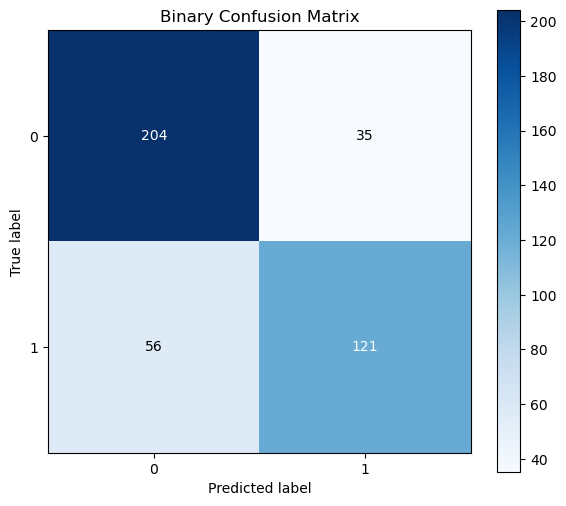

In [8]:
bin_model('svm', 'tfidf')

In [1]:
bin_model('knn', 'tfidf')

NameError: name 'bin_model' is not defined